In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pydrake.all import Simulator, StartMeshcat, LogVectorOutput, RandomGenerator
import numpy as np
import sponana.sim as sim
from pydrake.all import (
    AddMultibodyPlantSceneGraph,
    Box,
    ConnectPlanarSceneGraphVisualizer,
    DiagramBuilder,
    FixedOffsetFrame,
    JointIndex,
    Parser,
    PlanarJoint,
    RandomGenerator,
    RigidTransform,
    RotationMatrix,
    Simulator,
    StartMeshcat,
    UniformlyRandomRotationMatrix,
)

In [3]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7001


In [26]:
# Clean up the Meshcat instance.
meshcat.Delete()
meshcat.DeleteAddedControls()

# 156 could work
rng = np.random.default_rng(100)  # this is for python
generator = RandomGenerator(rng.integers(0, 1000))  # this is for c++

add_spot = True
simulation_time = -1  # run indefinitely until ESC is pressed
# simulation_time = 1
table_height = 0.2
debug = True

# spec1 = sim.TableSceneSpec(
#     has_banana=True,
#     banana_contact_params=(-0.17, 0., np.pi/2, 0),
#     n_objects=3,
#     # Cracker boxes
#     object_type_indices=[0, 0, 0],
#     object_contact_params=[(.05, -.18, np.pi/2, 1), (.05, .18, np.pi/2, 1), (.05, .0, np.pi/2, 1)]
# )
spec1 = sim.TableSceneSpec(
    has_banana=True,
    banana_contact_params=(-0.17, 0., np.pi/2, 0),
    n_objects=2,
    # Cracker boxes
    object_type_indices=[0, 0],
    object_contact_params=[(.02, -.08, 0, 2), (.1, .1, 0, 2)]
)
specs = [sim.TableSceneSpec(), spec1, sim.TableSceneSpec()]

simulator, diagram = sim.clutter_gen(
    meshcat, rng, table_height=table_height,
    debug=debug, simulation_time=simulation_time,
    table_specs=specs
)

x_sample [-0.1   0.05]
y_sample [-2.00000000e-01  2.77555756e-17]
appended: x_points_append: [-0.1] y_points_append: [-0.19999999999999998]
dist 0.25
appended: x_points_append: [-0.1, 0.04999999999999999] y_points_append: [-0.19999999999999998, 2.7755575615628914e-17]
dist 0.25
dist 0.0
dist 0.2
dist 0.15
appended: x_points_append: [-0.1, 0.04999999999999999, -0.1] y_points_append: [-0.19999999999999998, 2.7755575615628914e-17, 2.7755575615628914e-17]
dist 0.25
dist 0.0
dist 0.2
dist 0.15
dist 0.0
dist 0.15
dist 0.2
dist 0.25
appended: x_points_append: [-0.1, 0.04999999999999999, -0.1, 0.04999999999999999] y_points_append: [-0.19999999999999998, 2.7755575615628914e-17, 2.7755575615628914e-17, -0.19999999999999998]
x_sample [-0.1   0.05]
y_sample [-2.00000000e-01  2.77555756e-17]
appended: x_points_append: [-0.1] y_points_append: [2.7755575615628914e-17]
dist 0.2
appended: x_points_append: [-0.1, -0.1] y_points_append: [2.7755575615628914e-17, -0.19999999999999998]
dist 0.0
dist 0.0
dis

In [27]:
import sponana
import pickle
from sponana.hardcoded_cameras import get_camera_poses_table_frame

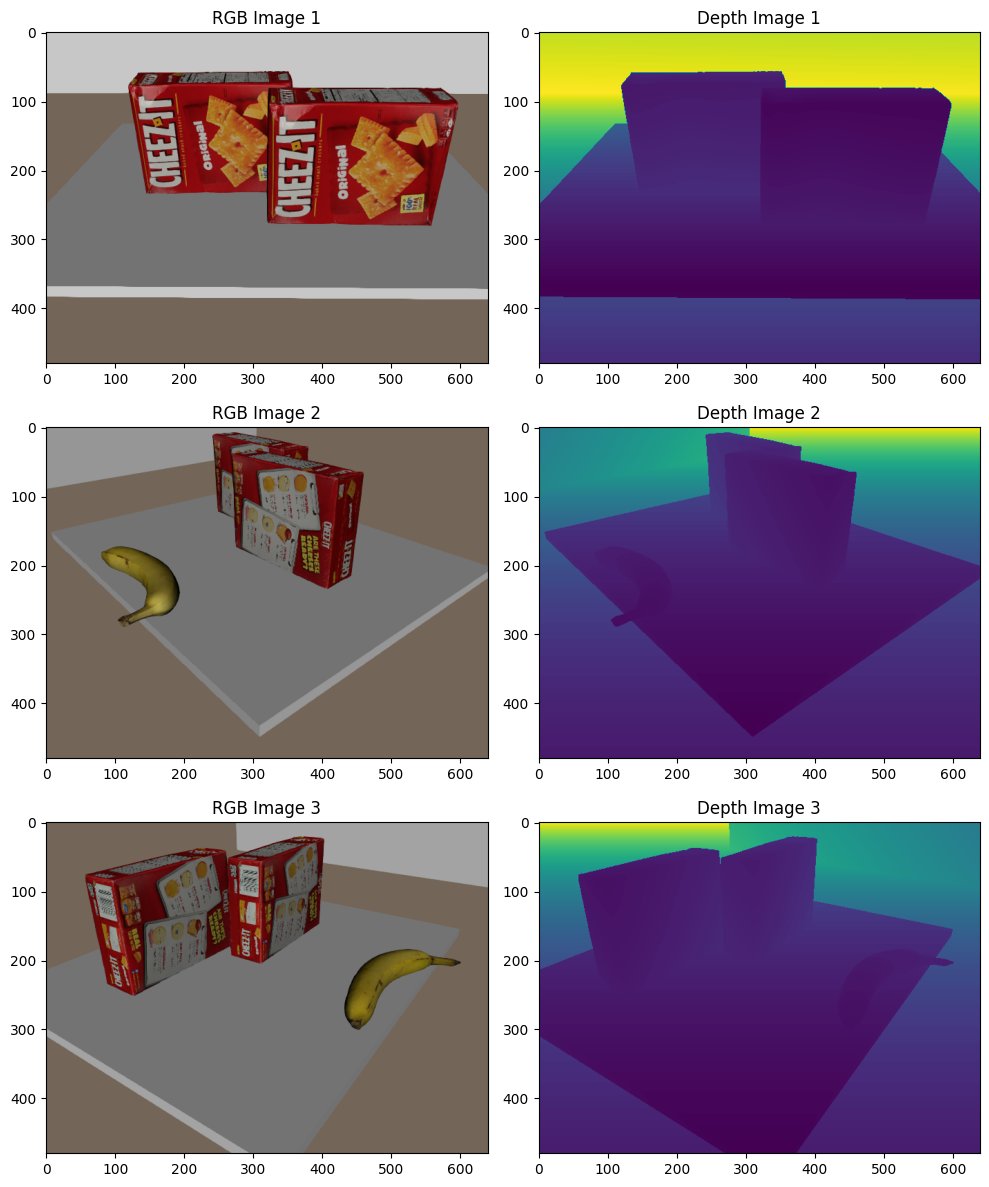

In [28]:
import matplotlib.pyplot as plt

context = simulator.get_mutable_context()
station = diagram.GetSubsystemByName("station")
scontext = station.GetMyContextFromRoot(context)

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

table_idx = 0
camera_poses_table_frame = get_camera_poses_table_frame()
table_pose_world_frame = sponana.hardcoded_cameras.Xs_WT[table_idx]
X_WT = table_pose_world_frame
camera_poses_world_frame = [X_WT @ X_TC for X_TC in camera_poses_table_frame]
rgb_imgs = []
depth_imgs = []
camera_matrices = []
for camera_idx in range(3):
    camera = station.GetSubsystemByName(f"rgbd_sensor_camera{camera_idx}_at_table{table_idx}")
    color_image = station.GetOutputPort(f"camera{camera_idx}_at_table{table_idx}.rgb_image").Eval(scontext)
    depth_image = station.GetOutputPort(f"camera{camera_idx}_at_table{table_idx}.depth_image").Eval(scontext)
    rgb_imgs.append(color_image.data)
    depth_imgs.append(depth_image.data)
    camera_matrices.append(camera.depth_camera_info())

    axs[camera_idx, 0].imshow(color_image.data)
    axs[camera_idx, 0].set_title(f"RGB Image {camera_idx+1}")
    axs[camera_idx, 1].imshow(depth_image.data)
    axs[camera_idx, 1].set_title(f"Depth Image {camera_idx+1}")

# Serialize the images and camera poses
import pickle
with open("images.pkl", "wb") as f:
    pickle.dump(rgb_imgs, f)
    pickle.dump(depth_imgs, f)
    pickle.dump(camera_poses_table_frame, f)
    pickle.dump(camera_poses_world_frame, f)
    pickle.dump(table_pose_world_frame, f)
    pickle.dump(camera_matrices, f)

plt.tight_layout()
plt.show()

Camera poses in table frame:
[RigidTransform(
  R=RotationMatrix([
    [-0.008426572055398018, 0.49998224790571183, -0.865994656255191],
    [0.9999644958114239, 0.004213286027699008, -0.007297625466794737],
    [0.0, -0.8660254037844386, -0.49999999999999983],
  ]),
  p=[0.5567144688632728, -0.003735510093671053, 0.29574999999999996],
), RigidTransform(
  R=RotationMatrix([
    [0.7564493864543211, -0.32702611735642795, 0.5664258506633156],
    [-0.6540522347128561, -0.3782246932271605, 0.6551043853465944],
    [0.0, -0.8660254037844387, -0.4999999999999999],
  ]),
  p=[-0.4067672805262673, -0.5122634135249003, 0.29574999999999996],
), RigidTransform(
  R=RotationMatrix([
    [-0.8214529060279898, -0.28513817842327355, 0.49387381220674975],
    [-0.5702763568465472, 0.4107264530139948, -0.7113990846327904],
    [0.0, -0.8660254037844387, -0.4999999999999999],
  ]),
  p=[-0.35091572089593653, 0.4881919030929625, 0.29574999999999996],
)]
Camera poses in world frame:
[RigidTransform(
  R

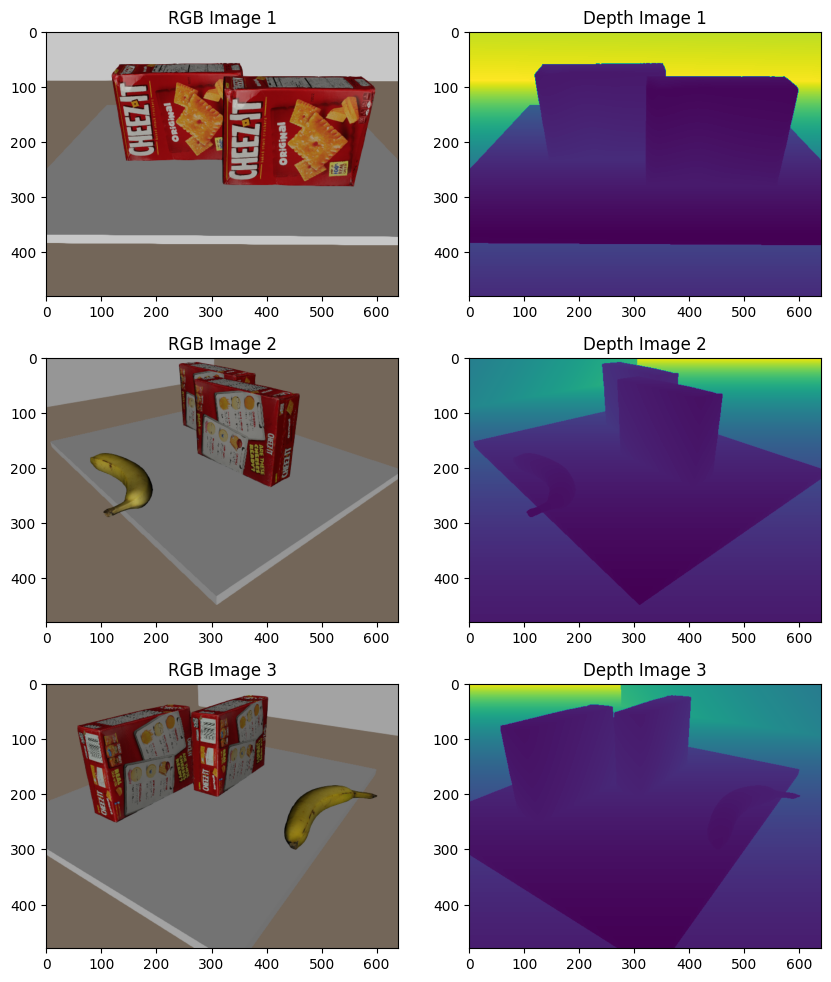

In [29]:
import matplotlib.pyplot as plt
import pickle

# Test loading in camera poses and images:
with open("images.pkl", "rb") as f:
    rgb_imgs = pickle.load(f)
    depth_imgs = pickle.load(f)
    camera_poses_table_frame = pickle.load(f)
    camera_poses_world_frame = pickle.load(f)
    table_pose_world_frame = pickle.load(f)
    camera_infos = pickle.load(f)

# Print poses and visualize images in same grid as above:
print("Camera poses in table frame:")
print(camera_poses_table_frame)
print("Camera poses in world frame:")
print(camera_poses_world_frame)
print("Table pose in world frame:")
print(table_pose_world_frame)
print("Camera infos:")
print(camera_infos)
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
for camera_idx in range(3):
    axs[camera_idx, 0].imshow(rgb_imgs[camera_idx])
    axs[camera_idx, 0].set_title(f"RGB Image {camera_idx+1}")
    axs[camera_idx, 1].imshow(depth_imgs[camera_idx])
    axs[camera_idx, 1].set_title(f"Depth Image {camera_idx+1}")

In [1]:
# Check cameras
context = simulator.get_mutable_context()
station = diagram.GetSubsystemByName("station")
context = station.GetMyContextFromRoot(context)
table_idx = 1
camera_idx = 0
color_image = station.GetOutputPort(f"camera{camera_idx}_at_table{table_idx}.rgb_image").Eval(context)
depth_image = station.GetOutputPort(f"camera{camera_idx}_at_table{table_idx}.depth_image").Eval(context)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(color_image.data)
plt.subplot(1, 2, 2)
plt.imshow(depth_image.data)

NameError: name 'simulator' is not defined

array([[[1.6852987 ],
        [1.6852757 ],
        [1.685253  ],
        ...,
        [1.670806  ],
        [1.6707838 ],
        [1.6707612 ]],

       [[1.686662  ],
        [1.6866393 ],
        [1.6866161 ],
        ...,
        [1.6721461 ],
        [1.6721236 ],
        [1.6721011 ]],

       [[1.6880277 ],
        [1.6880044 ],
        [1.6879817 ],
        ...,
        [1.6734883 ],
        [1.6734655 ],
        [1.6734432 ]],

       ...,

       [[0.58546495],
        [0.58546495],
        [0.58546495],
        ...,
        [0.58546495],
        [0.58546495],
        [0.58546495]],

       [[0.5844439 ],
        [0.5844439 ],
        [0.5844439 ],
        ...,
        [0.5844439 ],
        [0.5844439 ],
        [0.5844439 ]],

       [[0.5834268 ],
        [0.5834268 ],
        [0.5834268 ],
        ...,
        [0.5834268 ],
        [0.5834268 ],
        [0.5834268 ]]], dtype=float32)